<a href="https://colab.research.google.com/github/MahvashJebeli/Deep_Learning/blob/main/Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Deep Learning, Convolutional Neural Networks
# This code is my practice from the online course on https://www.youtube.com/playlist?list=PLQVvvaa0QuDfhTox0AjmQ6tvTgMBZBEXN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os # to iterate through directories and join paths
import cv2 # to perform image operations

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


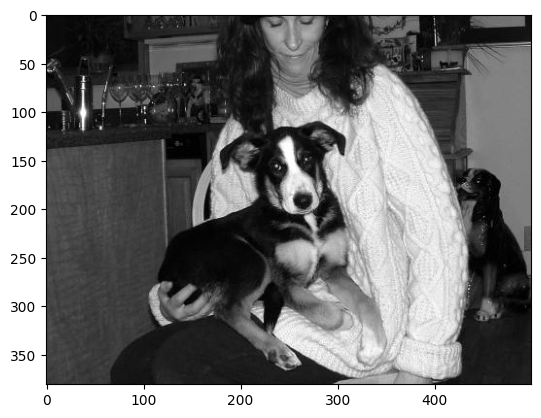

In [3]:
# Reading the images
# DATADIR = r"C:\Users\mahva\Jupyter\Deep Learning\PetImages"
DATADIR = r"/content/drive/MyDrive/Colab Notebooks/PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # Path
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # turning to grayscale to remove unnecessary info
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break
    break


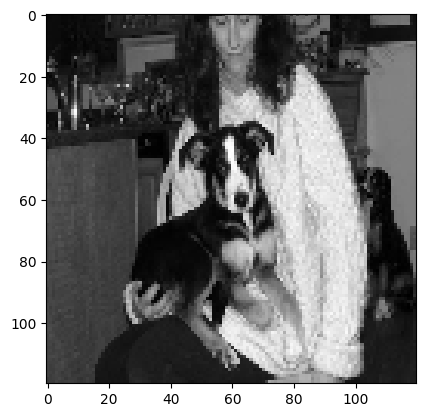

In [4]:
# Making al the images same size and shape
IMG_SIZE = 120
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [5]:
# Creating training data
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # Path
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
#                 print("1")
            except Exception as e:
                pass # passing through the broken images!

create_training_data()
print(len(training_data))

# shuffling the data
import random
random.shuffle(training_data)

24946


In [6]:
# Preparation to feed into the NN
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # -1 catches how many features we do have,
y = np.array(y)                                                   # 1 because it is grayscale

In [7]:
# Just saving the data to later tweak easier!!
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [8]:
# Opening saved data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

In [9]:
# Building the model
X = X/255.0 # Scaling (normalizing) the imagery data

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:])) # first layer
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3))) # second layer
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) # convolutional data is 2D, we need to flatten it.
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1)) # output
model.add(Activation('sigmoid'))

In [11]:
# Compiling the model
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy']) # binary because it is dog vs cat, we can go categorical as well.

# Fitting the model
model.fit(X, y, batch_size=50, epochs=10, validation_split=0.1)
# model.fit(X, y, batch_size=50, epochs=10)

Epoch 1/10
450/450 [==============================] - 990s 2s/step - loss: 0.5537 - accuracy: 0.7144 - val_loss: 0.5600 - val_accuracy: 0.7082
Epoch 2/10
450/450 [==============================] - 988s 2s/step - loss: 0.4632 - accuracy: 0.7778 - val_loss: 0.4934 - val_accuracy: 0.7651
Epoch 3/10
450/450 [==============================] - 1085s 2s/step - loss: 0.3898 - accuracy: 0.8242 - val_loss: 0.4833 - val_accuracy: 0.7739
Epoch 4/10
450/450 [==============================] - 1049s 2s/step - loss: 0.3107 - accuracy: 0.8650 - val_loss: 0.5273 - val_accuracy: 0.7679
Epoch 5/10
450/450 [==============================] - 1021s 2s/step - loss: 0.2241 - accuracy: 0.9071 - val_loss: 0.5354 - val_accuracy: 0.7812
Epoch 6/10
450/450 [==============================] - 1009s 2s/step - loss: 0.1330 - accuracy: 0.9503 - val_loss: 0.7261 - val_accuracy: 0.7675
Epoch 7/10
450/450 [==============================] - 957s 2s/step - loss: 0.0694 - accuracy: 0.9785 - val_loss: 0.9566 - val_accuracy: 0.